<a href="https://colab.research.google.com/github/Asma-malica/ML/blob/main/ML_Ridge%26Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#model overfit aagura naala thaa regularization ku porom  

* 2 types of regularization
  
   1 . Ridge
   
   2 . Lasso

#Ridge vs Lasso --> Lasso is better

#Ridge Regression..

* L2 regularization

* adding penalty term with error (squared value)

* error cannot reach zero as it is in circle shape  bcoz of squaring

* Perform L2 regularization ie adds penalty equivalent to the squre of the magnitude of coefficients

* Minimization objective = LS obj + alpha*2(sum of square of coefficients)

* Lridge(beta) = summation(y - x' * beta ) ^ 2 + lambda * summation(wj * betaj * 2)

#Lasso Regression

* L1 Regulation

* adding penalty term with error (absolute coefficient)

* diamond Shaped , error comes to zero

* L_lassso(beta) = summation(yi - xi' * beta) ^ 2 + lambda * summation ( abs(betaj))

* LS obj + L * (sum of absolute of coeff)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([2.1,3.8,6.5,9.2,11.3])


design matrix

In [ ]:
x_b = np.c_[np.ones([x.shape[0],1]),x]
x_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [ ]:
alpha_ridge = 1.0
alpha_lasso = 0.1
num_iteration = 1000
learning_rate = 0.01


lasso regression parameters --> input , o/p , iteration , alpha(learning rate)

In [ ]:
def lasso_regression(x,y,alpha,num_iterations,learning_rate):
  m , n = x.shape
  theta = np.zeros(n) #theta is same as weight
  for _ in range(num_iteration):
    y_pred = x.dot(theta)
    gradient = (x.T.dot(y_pred - y) + alpha * np.sign(theta))/m
    theta -= learning_rate * gradient
  return theta



ridge regression parameters --> input , o/p , iteration , alpha(learning rate)

In [ ]:
def ridge_regression(x,y,alpha,num_iterations,learning_rate):
  m , n = x.shape
  theta = np.zeros(n) #theta is same as weight
  for _ in range(num_iteration):
    y_pred = x.dot(theta)
    gradient = (x.T.dot(y_pred - y) + alpha * theta)/m # removing np.sign from lasso
    theta -= learning_rate * gradient
  return theta

In [ ]:
theta_ridge = ridge_regression(x_b,y,alpha_ridge,num_iteration,learning_rate)
print(theta_ridge)
theta_lasso = lasso_regression(x_b,y,alpha_lasso,num_iteration,learning_rate)
print(theta_lasso)

[0.05700254 2.17211411]
[-0.27352287  2.29942818]


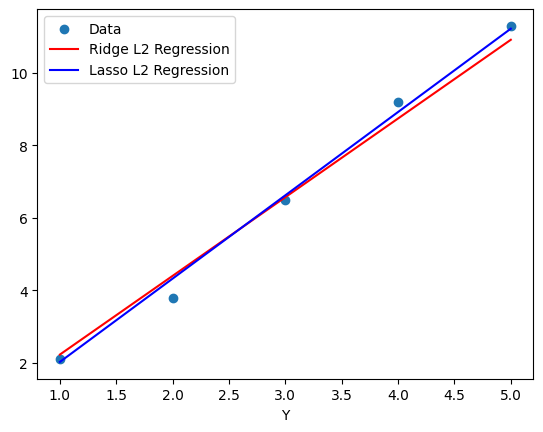

In [ ]:
plt.scatter(x,y,label = 'Data')
plt.plot(x,x_b.dot(theta_ridge),label = "Ridge L2 Regression",color = 'r')
plt.plot(x,x_b.dot(theta_lasso),label = "Lasso L1 Regression",color = 'b')
plt.xlabel("x")
plt.xlabel("Y")
plt.legend()
plt.show()